<a href="https://colab.research.google.com/github/kesavavignesh/GUVI-Assignments/blob/Final-Project%2FFinal-project/Final_Project_E_Commerce_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Project**

***E-Commerce customer segmentation***

***

**Target given by mentor**

The end objective of the participant is to come up with customer segmentations that take into account all the information that is presented in the dataset. The participant is expected to use NLP techniques to find similarity between the products.


***

**[ Things I've done ]**


   **In Description column only**

*   Drop Duplicates

*   Natural language processing(NLP)

1.   Remove punctuations
2.   Converting text to lowercase
3.   Removing stop words
4.   Lemmatization
5.   Bag of words



*   K-Means Clustering Algorithm (For NLP processed data)

**In Orginal Data**

*   One hot Encoding (Using "Description's" K-Means values)

*   K-Means Clustering Algorithm (For NLP processed data)


**Importing nessasary packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Getting CSV file**

In [ ]:
des = pd.read_csv("/content/drive/MyDrive/GUVI Final Project/E-commerce customer segmentation/data.csv", encoding= 'unicode_escape')
des['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

In [ ]:
des.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
des.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

In [ ]:
des.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
des['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

**Droping duplicates**

In [ ]:
dforg=des.copy()
des.drop_duplicates('Description',inplace=True)

In [ ]:
des['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
535327                        ????damages????
535329                               mixed up
535335                                   lost
537621     CREAM HANGING HEART T-LIGHT HOLDER
540421            PAPER CRAFT , LITTLE BIRDIE
Name: Description, Length: 4224, dtype: object

**Droping Missing Values (NaN)**

In [ ]:
des = des.dropna()

In [ ]:
des['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
503602    SET OF 6 RIBBONS PERFECTLY PRETTY  
504104                 SET OF 6 RIBBONS PARTY
527065              LETTER "U" BLING KEY RING
537621     CREAM HANGING HEART T-LIGHT HOLDER
540421            PAPER CRAFT , LITTLE BIRDIE
Name: Description, Length: 2888, dtype: object

# **Natural language processing (NLP)**

**Removing punctuation**

In [ ]:
des['Description'] = des['Description'].str.replace("[^a-zA-Z0-9]", " ")
des = des[['Description']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
des['Description']=des['Description'].fillna(" ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
des['Description'] = des['Description'].apply(lambda x: ' '.join([word for word in x.split() if len(word)>2]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
des['Description']

0            WHITE HANGING HEART LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4               RED WOOLLY HOTTIE WHITE HEART
                         ...                 
503602           SET RIBBONS PERFECTLY PRETTY
504104                      SET RIBBONS PARTY
527065                  LETTER BLING KEY RING
537621       CREAM HANGING HEART LIGHT HOLDER
540421              PAPER CRAFT LITTLE BIRDIE
Name: Description, Length: 2888, dtype: object

**Converting text to lowercase**

In [ ]:
des['Description'] = [review.lower() for review in des['Description']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
des['Description']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
503602           set ribbons perfectly pretty
504104                      set ribbons party
527065                  letter bling key ring
537621       cream hanging heart light holder
540421              paper craft little birdie
Name: Description, Length: 2888, dtype: object

**Removing stop words**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

def remove_stopwords(rev):
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

des['Description'] = [remove_stopwords(r) for r in des['Description']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
des['Description']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
503602           set ribbons perfectly pretty
504104                      set ribbons party
527065                  letter bling key ring
537621       cream hanging heart light holder
540421              paper craft little birdie
Name: Description, Length: 2888, dtype: object

**Lemmatization**

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')


lemmatizer = WordNetLemmatizer()


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None


def lemmatize_sentence(sentence):
 
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            
            lemmatized_sentence.append(word)
        else:        
           
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


des['Description'] = des['Description'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
des['Description']

0            white hang heart light holder
1                      white metal lantern
2            cream cupid heart coat hanger
3         knit union flag hot water bottle
4            red woolly hottie white heart
                        ...               
503602         set ribbon perfectly pretty
504104                    set ribbon party
527065               letter bling key ring
537621       cream hang heart light holder
540421           paper craft little birdie
Name: Description, Length: 2888, dtype: object

**Bag of words**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfides = TfidfVectorizer(max_features=2500)
des = tfides.fit_transform(des.Description).toarray()
featureNames = tfides.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
des

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **K-Means Clustering**

To find unique values

In [ ]:
from sklearn.cluster import KMeans
inertias = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(des)
    inertias.append(km.inertia_)

Elbow plot

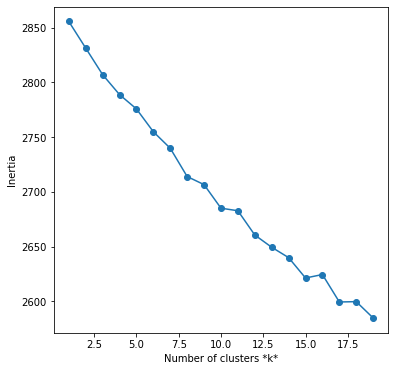

In [ ]:
from sklearn.cluster import KMeans
inertias = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(des)
    inertias.append(km.inertia_)

In [ ]:
dir(KMeans)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'predict',
 'score',
 'set_params',
 'transform']

In [ ]:
cus = KMeans(n_clusters=19,random_state=3)
cus.fit(des)

KMeans(n_clusters=19, random_state=3)

**One hot Encoding**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/GUVI Final Project/E-commerce customer segmentation/data.csv", encoding= 'unicode_escape')
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

In [ ]:
df = dforg.copy()
df.drop_duplicates('Description',inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
535327,581204,85104,????damages????,-355,12/7/2011 18:32,0.00,NaN,United Kingdom
535329,581206,21693,mixed up,-87,12/7/2011 18:34,0.00,NaN,United Kingdom
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.00,NaN,United Kingdom
537621,581334,85123A,CREAM HANGING HEART T-LIGHT HOLDER,4,12/8/2011 12:07,2.95,17841.0,United Kingdom


In [ ]:
df = df.dropna()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
t = cus.predict(des).tolist()

In [ ]:
df["lable"]= t
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,lable
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,5
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,5
...,...,...,...,...,...,...,...,...,...
503602,578928,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,3,11/27/2011 12:29,2.89,15443.0,United Kingdom,1
504104,578942,23561,SET OF 6 RIBBONS PARTY,1,11/27/2011 13:29,2.89,17288.0,United Kingdom,1
527065,580691,90214U,"LETTER ""U"" BLING KEY RING",12,12/5/2011 15:48,0.29,13790.0,United Kingdom,0
537621,581334,85123A,CREAM HANGING HEART T-LIGHT HOLDER,4,12/8/2011 12:07,2.95,17841.0,United Kingdom,5


In [ ]:
df.drop(df.columns[[0, 1, 2, 3, 4 ,5, 7]], axis = 1, inplace = True)
  
df

,C_4,C_6,C_7,C_8,C_9,C_10,C_11,C_12,C_13,C_14,...,C_9,C_10,C_11,C_12,C_13,C_14,C_15,C_16,C_17,C_18
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
504104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df["lable"]= t
df

,C_4,C_6,C_7,C_8,C_9,C_10,C_11,C_12,C_13,C_14,...,C_10,C_11,C_12,C_13,C_14,C_15,C_16,C_17,C_18,lable
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
504104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
527065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


***One hot Encoding***

In [ ]:
df = pd.get_dummies(df, columns=["lable"], prefix=["C"] )

In [ ]:
df

,Description,CustomerID,C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7,...,C_9,C_10,C_11,C_12,C_13,C_14,C_15,C_16,C_17,C_18
0,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,WHITE METAL LANTERN,17850.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CREAM CUPID HEARTS COAT HANGER,17850.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,RED WOOLLY HOTTIE WHITE HEART.,17850.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503602,SET OF 6 RIBBONS PERFECTLY PRETTY,15443.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
504104,SET OF 6 RIBBONS PARTY,17288.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527065,"LETTER ""U"" BLING KEY RING",13790.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537621,CREAM HANGING HEART T-LIGHT HOLDER,17841.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# **K-Means Clustering**

In [ ]:
cus = KMeans(n_clusters=19,random_state=3)
cus.fit(df)

KMeans(n_clusters=19, random_state=3)

In [ ]:
from sklearn.cluster import KMeans
inertias = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df)
    inertias.append(km.inertia_)

Elbow plot

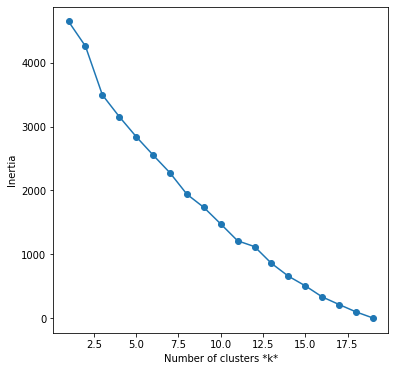

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia');